## 9.2 k-NN 알고리즘에 사용할  견종의 표본 집합 시각화

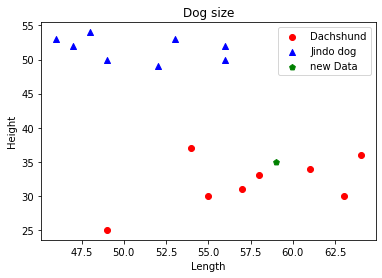

In [3]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
#  진돗개의 길이와  높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

newdata_length = [59]   # 새로운 데이터의 길이
newdata_height = [35]   # 새로운 데이터의 높이

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height, c='b',marker='^', label='Jindo dog')
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, c='g', marker='p', label='new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

## 9.3 k-NN 분류기 실행

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
#  진돗개의 길이와  높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.zeros(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'}

k = 3         # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ',판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] ,판정 결과: 닥스훈트


## 9.4 k-NN 활용 예제-붓꽃 데이터 준비하기

In [5]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:3]     # 최초 3개 데이터의 값을 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
print('iris 데이터의 형태', iris.data.shape)

iris 데이터의 형태 (150, 4)


In [7]:
print('iris 데이터의 속성들:', iris.feature_names)

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 9.5 k-NN 활용 예제-붓꽃 데이터로 학습

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [14]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.933


## 9.6 새로운 데이터에 대하여 모델을 적용하고 분류

In [18]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [19]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor
n_neighbors가 3일때 정확도: 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x1b18dab9e20>)

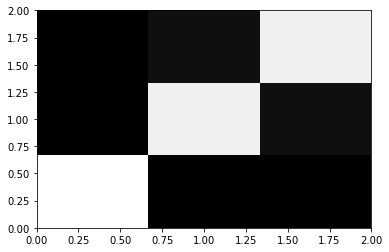

In [20]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)